# Análise e Transformação de Dados @ DEI-FCTUC
## Uma resolução dos exercícios da Ficha Prática nº 3 - Parte A usando MATLAB
### Autoria: Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se iniciar a análise de séries temporais, efetuando o seu pré-processamento e a sua decomposição em componentes que traduzem os movimentos estruturais e erráticos.


**Exercício 1.**
	
Uma série temporal é uma sequência temporalmente ordenada de dados. O estudo estatístico de Séries Temporais envolve, em geral, dois aspetos: 
    a) Análise e Modelação da Série Temporal – para descrever a série, verificar as suas características mais relevantes e investigar as possíveis relações com outras séries; 
    b) Previsão da Série Temporal – determinar boas previsões de valores futuros da série, num dado horizonte de previsão, a partir de valores passados da série. 
    
Antes de iniciar a análise da uma série temporal deve-se proceder à sua preparação através do pré-processamento dos dados que envolve, normalmente, as seguintes operações:
- Deteção e regularização do espaçamento dos dados, envolvendo a deteção de dados em falta (por exemplo, identificados pelo valor NaN) e a sua substituição por um valor estimado usando, por exemplo, um método de interpolação ou de extrapolação;
- Deteção e regularização de valores atípicos (*outliers*), envolvendo a sua deteção considerando, por exemplo, o critério |$x_{i}$-μ|>3σ, sendo $x_{i}$ o valor da série no índice *i*, μ a média da série e σ o desvio padrão da série, e a sua substituição por um valor adequado.
Dependendo do outlier ser aditivo ou subtrativo, o valor a usar poderá ser, por exemplo, $x_{i}$=μ+2.5σ no caso aditivo e $x_{i}$=μ-2.5σ no caso subtrativo.
    
De referir que o pré-processamento dos dados é muito importante porque a existência de dados em falta e/ou de *outliers* pode comprometer os procedimentos de análise e de modelação da série temporal, podendo, nomeadamente, induzir uma identificação incorreta do modelo e uma estimação enviesada dos seus parâmetros.

Neste trabalho, pretende-se tratar a série temporal que representa a evolução da temperatura média numa dada localização. No caso, considera-se o dataset com os dados de Lisboa de 1980 a 2018. 

Cada amostra da série corresponde a 1 mês, sendo a primeira referente a janeiro de 1980.

**Exercício 1.1** Ler e representar graficamente a série temporal existente no ficheiro de dados "lisbon_temp_fmt" (temperaturas com espaçamento temporal em meses).

In [1]:
%--- Ler ficheiro com a série temporal
%--- Contém: temp, months, years
load lisbon_temp_fmt.mat
x1=temp; % série temporal
N=length(x1) % Comprimento da série temporal
n=(0:N-1)'; % escala temporal em meses


N =

   468




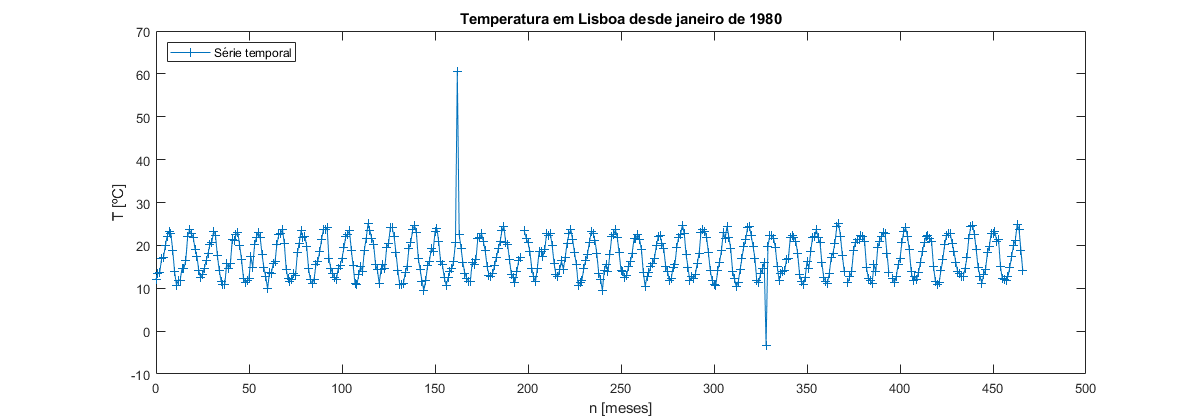

In [2]:
%plot inline -w 1200
%--- Representação gráfica

figure(1)
plot(n,x1,'-+');
legend('Série temporal','Location','northwest')
xlabel('n [meses]');
ylabel('T [ºC]')
title('Temperatura em Lisboa desde janeiro de 1980');

<strong>Exercício 1.2</strong> Verificar a existência de valores não recolhidos/medidos, identificados com NaN (*Not a Number*). Identifique-os, e substitua cada um desses valores por valores que resultam de um processo de extrapolação e represente graficamente a série temporal modificada, comparando-a com a inicial.
Sugestão: Reconstruir os valores em falta usando extrapolação com o método '*pchip*' (**interp1**).

Há NaN?

haNaN =

  logical

   1


indNaN =

   198
   372
   396
   468


ans =

   NaN
   NaN
   NaN
   NaN


ans =

   15.9061
   11.4200
    9.4944
    9.3000




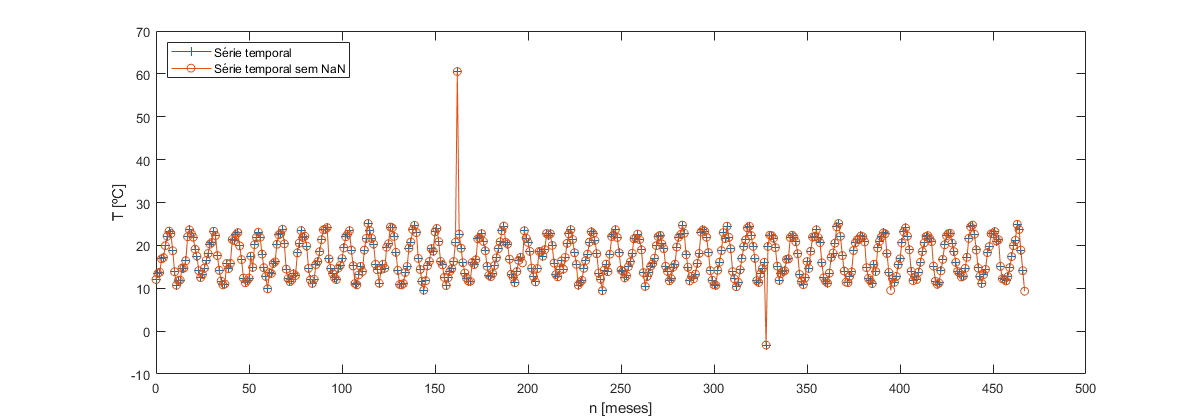

In [3]:
% Ex 1.2
%---Verifica a existência de NaN
disp('Há NaN?')
haNaN=any(isnan(x1)) % Há NaN por colunas?
indNaN=find(isnan(x1)) % Elementos com NaN
x1(indNaN)

%---Elimina linhas com NaN e reconstrói
% Sugestão:
% - Reconstruir as linhas eliminadas usando extrapolação (interp1)
x1r=x1;
if haNaN
    ind = indNaN;
    for k=1:length(ind)
        nn=n(ind(k)-4:ind(k)-1); % admitindo que não há NaNs no início
        xx=x1r(ind(k)-4:ind(k)-1);
        x1r(ind(k))=interp1(nn,xx,n(ind(k)),'pchip','extrap');
    end
end
x1r(indNaN)

figure(2)
plot(n,x1,'-+',n,x1r,'-o');
legend('Série temporal','Série temporal sem NaN','Location','northwest')
ylabel('T [ºC]')
xlabel('n [meses]');

**Exercício 1.3** Determinar os valores da média (**mean**) e do desvio padrão (**std**) da série temporal. Determinar a correlação (**corrcoef**) entre a temperatura na década de 80 e a temperatura na década de 90. Comentar os resultados.

In [4]:
% Ex 1.3
%---Média, desvio padrão e correlação
% - Funções: mean, std e corrcoef
mu1 = mean(x1r)
sigma1 = std(x1r)

%Determinar temperaturas na decada de 80 e 90
ix80=1;
ix89=find(years==1989)*12;
ix90=ix89+1;
ix99=find(years==1999)*12;

temp80=x1r(ix80:ix89);
temp90=x1r(ix90:ix99);

disp('Correlação entre as duas séries temporais sem NaN:')
corr=corrcoef(temp80,temp90)


mu1 =

   17.2835


sigma1 =

    4.7797

Correlação entre as duas séries temporais sem NaN:

corr =

    1.0000    0.7173
    0.7173    1.0000




    Sendo a correlação entre as duas séries temporais de 0.7173, pode concluir-se que estas são fortemente correlacionadas.

**Exercício 1.4** Verificar a existência de *outliers*. Identifique-os, substitua-os por valores adequados e represente graficamente a série temporal modificada, comparando-a com as anteriores.


indoutl1 =

   163
   329


nout1 =

     2


ans =

   60.5500
   -3.2500




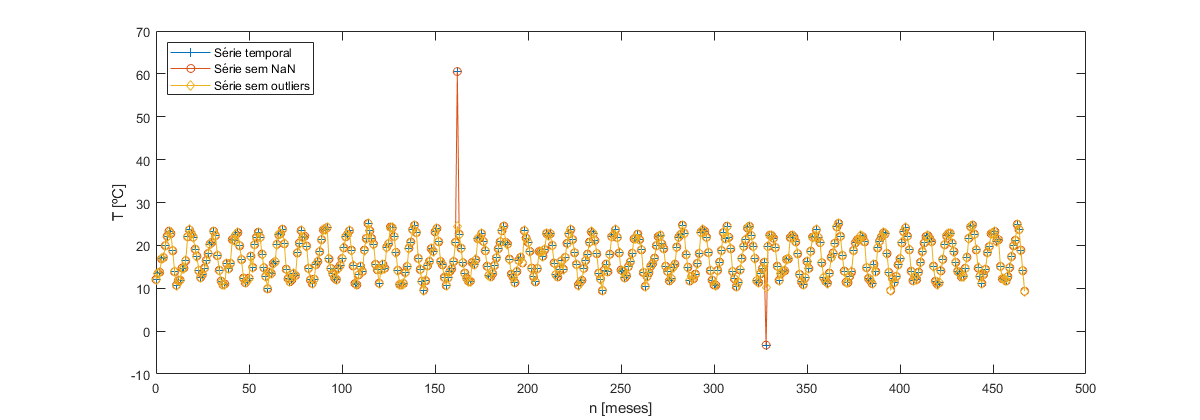

In [5]:
% Ex 1.4
%---Verifica outliers
indoutl1 = find(abs(x1r - mu1) > 3*sigma1) % Identifica outliers
nout1 = length(indoutl1) % número de outliers
x1r(indoutl1)

x1ro=x1r; % Substituição dos outliers
if nout1
    for k=1:numel(indoutl1)
        if x1ro(indoutl1(k)) > mu1
            x1ro(indoutl1(k)) = mu1 + 1.5*sigma1;
        else
            x1ro(indoutl1(k)) = mu1 - 1.5*sigma1;
        end
    end
end

figure(3) % representação gráfica dos resultados
plot(n,x1,'-+',n,x1r,'-o',n,x1ro,'-d');
legend('Série temporal','Série sem NaN','Série sem outliers','Location','northwest')
xlabel('n [meses]');
ylabel('T [ºC]')

**Exercício 2.**
	
A análise da série temporal considera, habitualmente, a existência de componentes associadas a movimentos estruturais e a movimentos erráticos: a) tendência (ou tendência-ciclo, quando agrupada com a componente cíclica) – movimento subjacente de longo-prazo que caracteriza a evolução do nível médio da série; b) sazonal – movimentos estritamente periódicos, decorrentes de características ou fatores que influenciam a evolução da série; c) cíclica – movimentos oscilatórios de tipo recorrente; d) errática/irregular – movimentos aleatórios decorrentes de uma multiplicidade de fatores e de natureza imprevisível. Estas quatro componentes podem ser combinadas de forma multiplicativa ou aditiva (forma a considerar neste exercício).

**Exercício 2.1** Estimar a componente da tendência para a série temporal que resulta do exercício 1, considerando aproximações polinomiais de grau 0 e 1 e usando a função **detrend**. Calcular a série sem a tendência. Representar graficamente a série temporal em bruto, a componente da tendência e a série temporal sem a tendência de grau 0 e de grau 1.

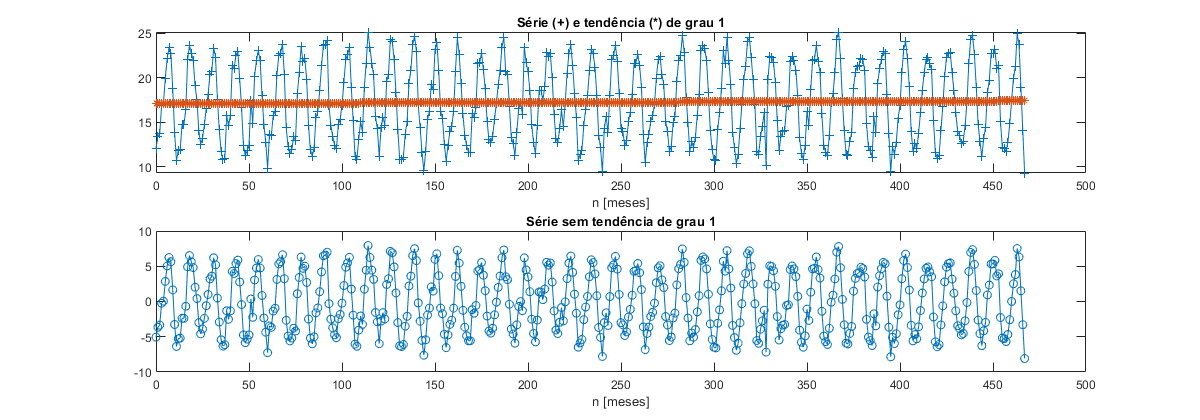

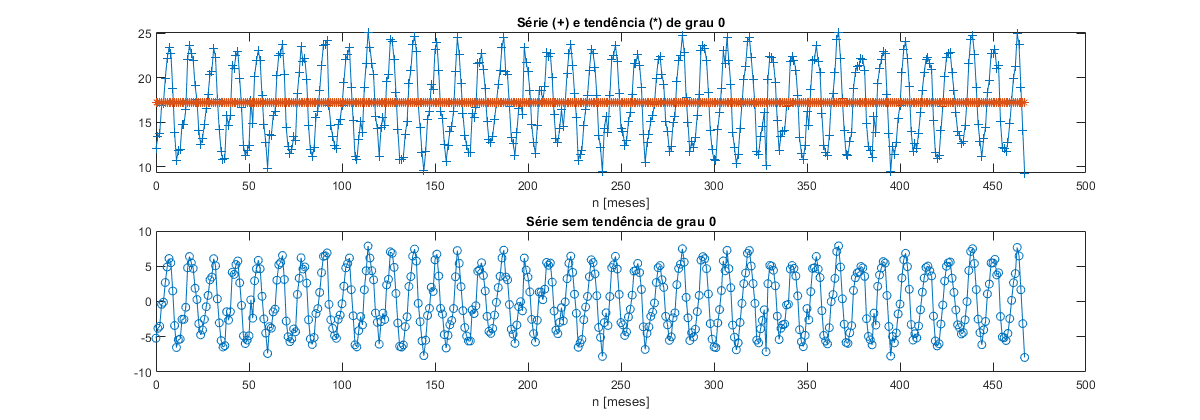

In [6]:
% Ex. 2.1 
%---Estimar tendência paramétrica (polinomial)
% trend de ordem 0
x1ro_t0=detrend(x1ro,'constant'); % média da série
tr1_0=x1ro-x1ro_t0;
% trend de ordem 1
x1ro_t1=detrend(x1ro,'linear'); % série sem a tendência
tr1_1=x1ro-x1ro_t1;

figure(4)
subplot(211)
plot(n,x1ro,'-+',n,tr1_0,'-*');
title('Série (+) e tendência (*) de grau 0')
xlabel('n [meses]');
subplot(212)
plot(n,x1ro_t0,'-o');
title('Série sem tendência de grau 0')
xlabel('n [meses]');

figure(5)
subplot(211)
plot(n,x1ro,'-+',n,tr1_1,'-*');
title('Série (+) e tendência (*) de grau 1')
xlabel('n [meses]');
subplot(212)
plot(n,x1ro_t1,'-o');
title('Série sem tendência de grau 1')
xlabel('n [meses]');

**Exercício 2.2** Estimar a tendência quadrática considerando uma aproximação polinomial de grau 2, usando as funções **polyfit** e **polyval**. Representar graficamente a série temporal em bruto, a componente da tendência e a série temporal sem a tendência quadrática.

 Aproximação linear de 2º grau:

p1 =

   -0.0000    0.0012   17.0370




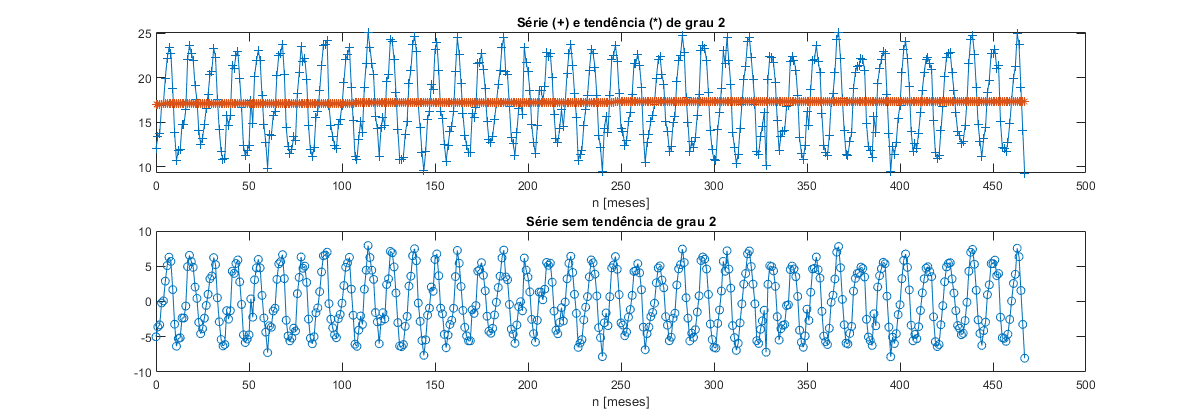

In [7]:
% Ex. 2.2
% trend de ordem 2
disp(' Aproximação linear de 2º grau:')
p1=polyfit(n,x1ro,2) % coeficientes dos polinómios
tr1_2=polyval(p1,n); % valores resultantes
x1ro_t2=x1ro-tr1_2;

figure(6)
subplot(211)
plot(n,x1ro,'-+',n,tr1_2,'-*');
title('Série (+) e tendência (*) de grau 2')
xlabel('n [meses]');
subplot(212)
plot(n,x1ro_t2,'-o');
title('Série sem tendência de grau 2')
xlabel('n [meses]');

**Exercício 2.3** Estimar a componente da sazonalidade da série temporal (sem a componente da tendência), assumindo uma sazonalidade anual. Representar graficamente a série temporal em bruto, sem as componentes da tendência e da sazonalidade.

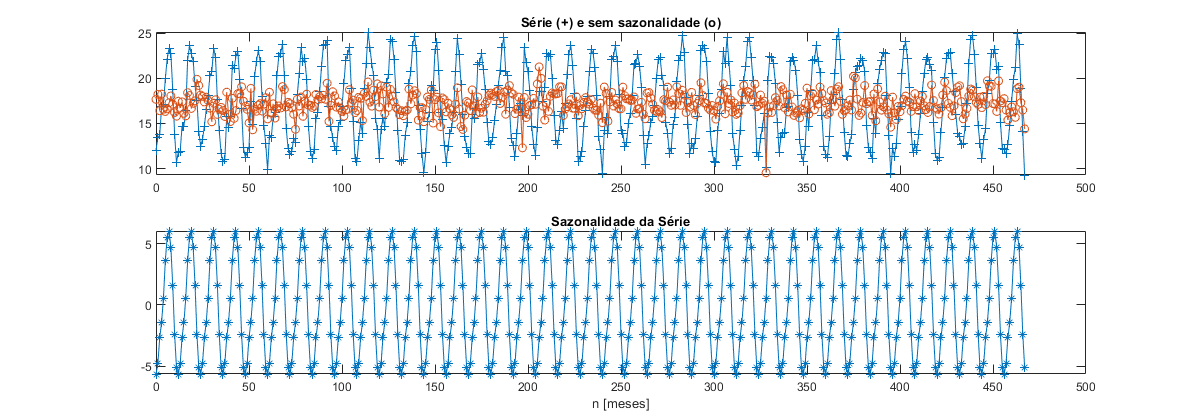

In [8]:
% Ex 2.3
%---Estimar Sazonalidade

period=12; % assumindo sazonalidade de 12 meses

x1ro_t2Mat=reshape(x1ro_t2,period,floor(numel(x1ro_t2)/period));
saz1=repmat(mean(x1ro_t2Mat,2),floor(numel(x1ro_t2)/period),1);

x1ro_s=x1ro-saz1;

figure(7)
subplot(211)
plot(n,x1ro,'-+',n,x1ro_s,'-o');
title('Série (+) e sem sazonalidade (o)')
subplot(212)
plot(n,saz1,'-*');
title('Sazonalidade da Série')
xlabel('n [meses]');

**Exercício 2.4** Obter a componente irregular. Representar graficamente a série temporal regularizada, sem a componente irregular e a respetiva componente irregular.

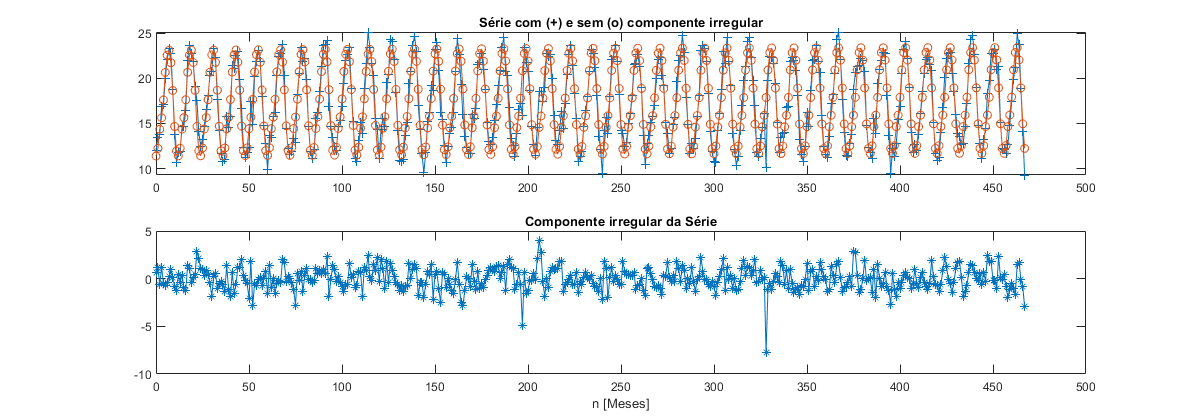

In [9]:
% Ex. 2.4

%--- Estimar a componente irregular
irreg1=x1ro-tr1_2-saz1;

% série temporal sem a componente irregular
x1ro_i=x1ro-irreg1;

figure(8)
subplot(211)
plot(n,x1ro,'-+',n,x1ro_i,'-o');
title('Série com (+) e sem (o) componente irregular')
subplot(212)
plot(n,irreg1,'-*');
title('Componente irregular da Série')
xlabel('n [Meses]');